<a href="https://colab.research.google.com/github/sitiluthfiatinsolihah/BelajarCloneRespository/blob/main/Kemiskinan_20210120015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise Practice 1 - Structured Dataset



---

---





## Exploratory Data Analysis (EDA)
Exploratory Data Analysis mengacu pada proses kritis melakukan penyelidikan awal pada data untuk menemukan pola, untuk menemukan anomali, untuk menguji hipotesis (statistik inferentif) dan untuk memeriksa asumsi dengan bantuan statistik deskriptif dan representasi grafis. [source](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)
- Matplotlib
- Seaborn
- Pandas
- Other Plotting Library

In [ ]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler,MinMaxScaler


### Exploring The Data

In [ ]:
# # Read dataset - Diabetes
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/kemiskinan.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# select with no duplicated data
df = df[~df.duplicated()]

In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provinsi       34 non-null     object 
 1   Penduduk       34 non-null     float64
 2   PendudukN      34 non-null     float64
 3   Kemiskinan     34 non-null     float64
 4   IPM            34 non-null     float64
 5   UsiaProduktif  34 non-null     float64
 6   PLN            34 non-null     float64
 7   Kepadatan      34 non-null     int64  
 8   Pengeluaran    34 non-null     int64  
 9   PengeluaranN   34 non-null     float64
 10  KatMiskin      34 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 3.2+ KB


In [ ]:
# Number of Unqie Value in Every Columns
df.nunique()

Provinsi         34
Penduduk         34
PendudukN        34
Kemiskinan       34
IPM              33
UsiaProduktif    31
PLN              33
Kepadatan        34
Pengeluaran      34
PengeluaranN     34
KatMiskin         2
dtype: int64

### Describe The Data

In [ ]:
df.describe() # Hanya menjalankan kolom dengan data numerik

,Penduduk,PendudukN,Kemiskinan,IPM,UsiaProduktif,PLN,Kepadatan,Pengeluaran,PengeluaranN,KatMiskin
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,3.400000e+01,34.000000,34.000000
mean,810.285294,2.755176,10.805588,71.051471,93.966471,93.282353,739.235294,1.252578e+06,31.306765,0.470588
std,1157.914066,4.211042,5.412993,3.917972,2.013129,10.640320,2708.964401,2.908247e+05,19.870131,0.506640
min,52.700000,0.000000,4.450000,60.440000,89.050000,43.140000,9.000000,7.943610e+05,0.000000,0.000000
25%,199.420000,0.533250,6.722500,68.897500,93.147500,91.477500,53.250000,1.065357e+06,18.515500,0.000000
50%,367.750000,1.146000,9.065000,71.425000,94.430000,97.220000,102.500000,1.133382e+06,23.163000,0.000000
75%,851.707500,2.905500,13.040000,72.307500,95.420000,99.360000,258.000000,1.381372e+06,40.106750,1.000000
max,4585.970000,16.486000,26.800000,80.770000,96.680000,99.990000,15907.000000,2.257991e+06,100.000000,1.000000


In [ ]:
df

,,,,,,,,,,,,,,|1x3 Cross validator
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


## Data collection

In [ ]:
datasets_1 = np.genfromtxt('/content/drive/MyDrive/Machine Learning/kemiskinan.csv', delimiter=',', dtype=str)

column_names = datasets_1[0]
data = datasets_1[1:]

df = pd.DataFrame(data, columns=column_names)

In [ ]:
from numpy import unique
for i in range(df.shape[1]):
    if len(unique(df.iloc[:, i])) <= 1:
        print(i)
    else:
        print(i, len(unique(df.iloc[:, i])))


0 34
1 34
2 34
3 34
4 33
5 31
6 33
7 34
8 34
9 34
10 2


In [ ]:
print(df.shape)
for a in column_names:
    df = df[df[a].str.contains('\?') == False]

print(df.shape)
df.drop_duplicates()
df.dropna()
df.isnull().sum()
print(df.shape)

(34, 11)
(34, 11)
(34, 11)


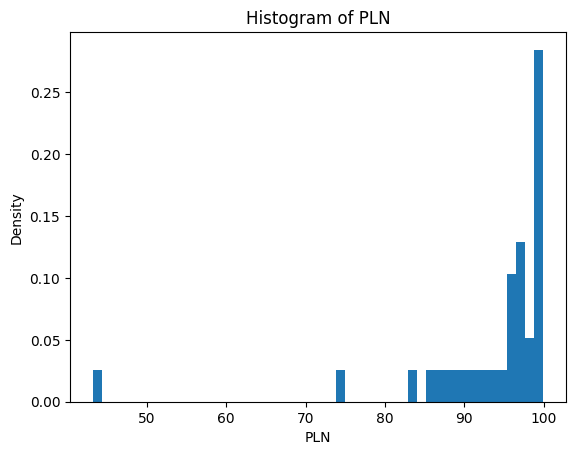

In [ ]:
df['PLN'] = pd.to_numeric(df['PLN'], errors='coerce')
ax = df['PLN'].plot.hist(bins=50, density=True)

ax.set_xlabel('PLN')
ax.set_ylabel('Density')
ax.set_title('Histogram of PLN')

plt.show()

Removing outliers

In [ ]:
df=df.drop('IPM',axis = 1)
np.random.seed(5)
data = df.to_numpy()
np.random.shuffle(data)
y = data[:,-1]
data =np.delete(data,[3],axis = 1)

 Feature selection is done in this step that Education-num is deleted for the repetition.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

categorical_features=[0]
categorical_names = {}
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_


t = [('cat', OneHotEncoder(),[0]),('num',MinMaxScaler(),[1,2,3,4,5,6,7,8])]

transformer = ColumnTransformer(transformers=t)
le= LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_
data = data.astype(float)

data_1 = data[0:3000]
y_1 = y[0:3000]

In [ ]:
df

,Provinsi,Penduduk,PendudukN,Kemiskinan,UsiaProduktif,PLN,Kepadatan,Pengeluaran,PengeluaranN,KatMiskin
0,Aceh,833.91,2.841,15.43,93.41,99.39,91,1080171,19.527,1
1,Sumatera Utara,1356.72,4.742,9.14,93.09,97.64,203,1124253,22.539,0
2,Sumatera Barat,364.79,1.135,6.56,93.12,97.39,132,1235050,30.109,0
3,Riau,491.22,1.595,7.04,93.68,91.04,73,1340446,37.31,0
4,Jambi,288.1,0.856,7.97,94.87,95.68,71,1126690,22.706,0
5,Sumatera Selatan,1119.65,3.88,12.98,94.49,94.87,92,1022030,15.555,1
6,Bengkulu,306,0.921,15.3,95.93,97.36,101,1140075,23.62,1
7,Lampung,1091.14,3.777,12.76,95.33,97.81,260,974424,12.302,1
8,Kepulauan Bangka Belitung,72.05,0.07,4.89,94.75,98.98,89,1501844,48.338,0
9,Kepulauan Riau,142.61,0.327,6.13,89.66,95.85,252,1773521,66.899,0


### Pie Diagram

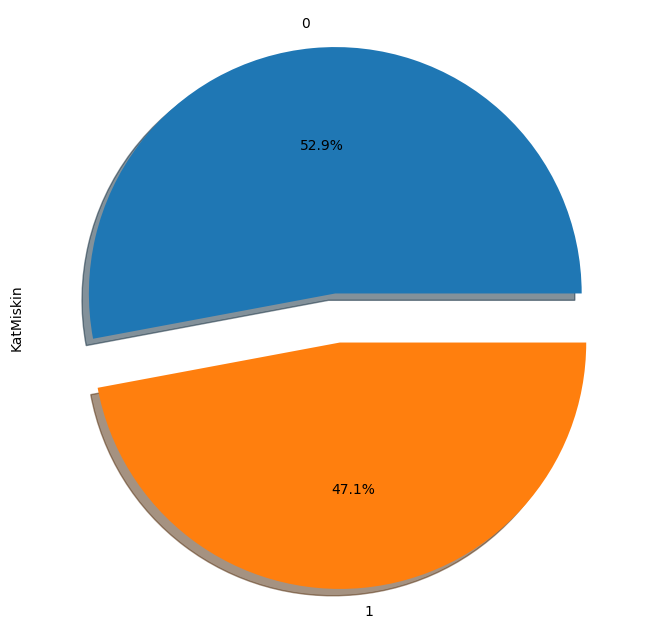

In [ ]:
# Pandas plotting with matplotlib
df['KatMiskin'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provinsi       34 non-null     object 
 1   Penduduk       34 non-null     object 
 2   PendudukN      34 non-null     object 
 3   Kemiskinan     34 non-null     object 
 4   UsiaProduktif  34 non-null     object 
 5   PLN            34 non-null     float64
 6   Kepadatan      34 non-null     object 
 7   Pengeluaran    34 non-null     object 
 8   PengeluaranN   34 non-null     object 
 9   KatMiskin      34 non-null     object 
dtypes: float64(1), object(9)
memory usage: 2.9+ KB


In [ ]:
df['Penduduk'] = df['Penduduk'].astype(str).str.split('.').str[0].astype(int)
df['Kemiskinan'] = df['Kemiskinan'].astype(str).str.split('.').str[0].astype(int)
df['UsiaProduktif'] = df['UsiaProduktif'].astype(str).str.split('.').str[0].astype(int)
df['Kepadatan']=df['Kepadatan'].astype(str).astype(int)
df['Pengeluaran']=df['Pengeluaran'].astype(str).astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provinsi       34 non-null     object 
 1   Penduduk       34 non-null     int64  
 2   PendudukN      34 non-null     object 
 3   Kemiskinan     34 non-null     int64  
 4   UsiaProduktif  34 non-null     int64  
 5   PLN            34 non-null     float64
 6   Kepadatan      34 non-null     int64  
 7   Pengeluaran    34 non-null     int64  
 8   PengeluaranN   34 non-null     object 
 9   KatMiskin      34 non-null     object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.9+ KB


### Boxplot
[Deskripsi Boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

![image.png](https://miro.medium.com/max/656/1*2c21SkzJMf3frPXPAR_gZA.png)


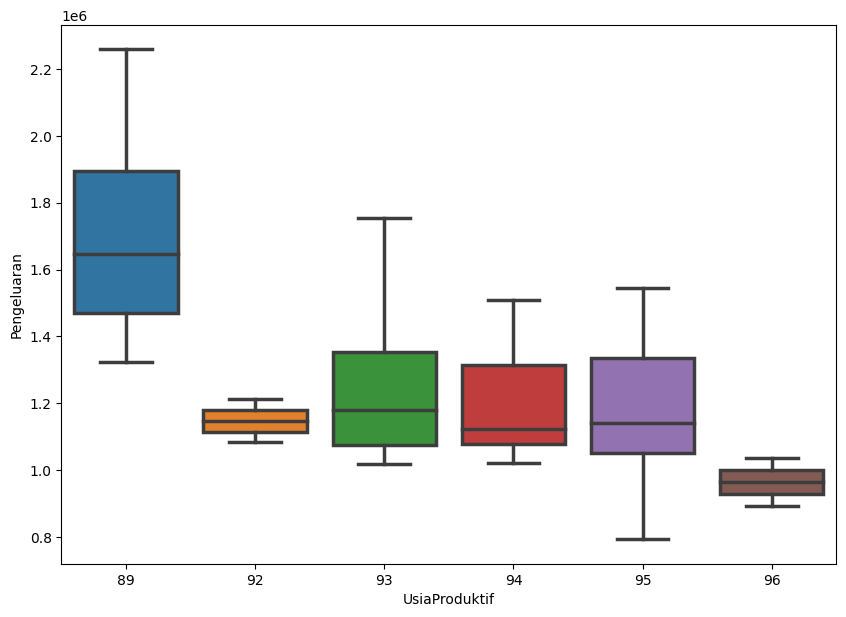

In [ ]:
# Seaborn with Matplotlib
fig=plt.gcf()
fig.set_size_inches(10,7)
#fig=sns.boxplot(x='Age', y='Hours per week', data=df,order=['<50K','>=50K'], linewidth=2.5)
fig=sns.boxplot(x='UsiaProduktif', y='Pengeluaran', data=df, linewidth=2.5)

### Countplot and Barplot (with subplot)

`Countplot digunakan untuk menghitung jumlah sample, sedangkan Barplot salah satunya digunakan untuk menghitung rate/prosentase dari sample.`

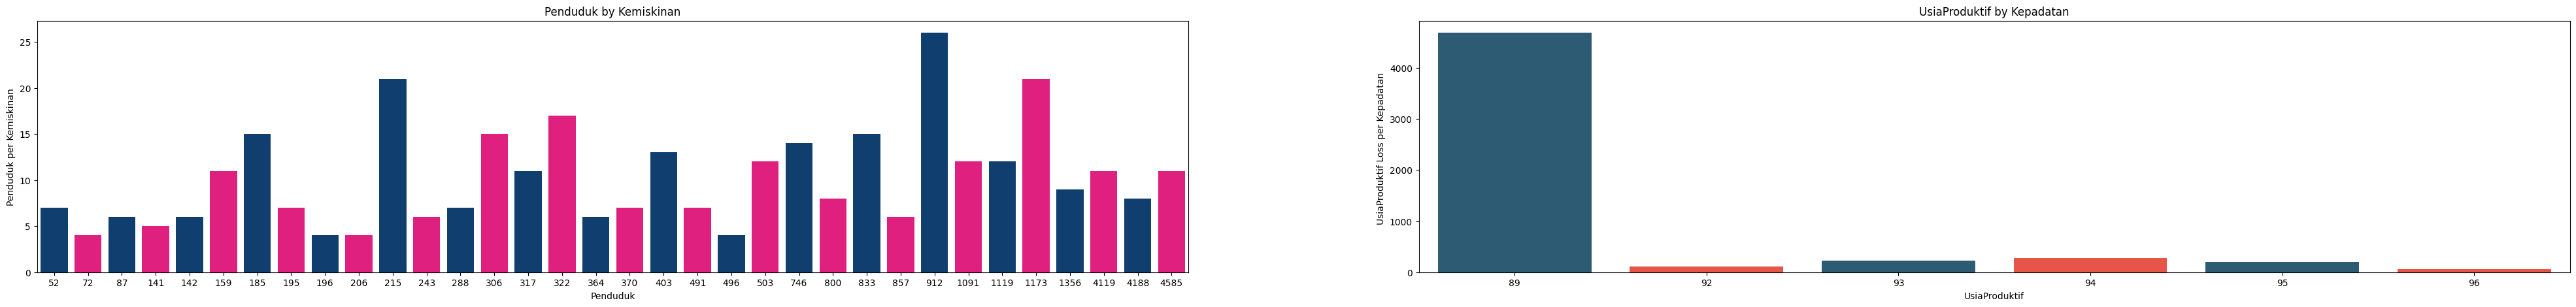

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(50,5))
#a = sns.countplot(df['Age'], ax=axarr[0], palette=('#003f7f','#ff007f')).set_title('Income count by Age')
axarr[0].set_title('Penduduk by Kemiskinan')
axarr[1].set_title('UsiaProduktif by Kepadatan')

a = sns.barplot(x='Penduduk', y='Kemiskinan', data=df, palette=('#003f7f','#ff007f'), errorbar=None, ax=axarr[0]).set_ylabel('Penduduk per Kemiskinan')
b = sns.barplot(x='UsiaProduktif', y='Kepadatan', data=df, palette=('#215f7f','#ff412f'), errorbar=None, ax=axarr[1]).set_ylabel('UsiaProduktif Loss per Kepadatan ')


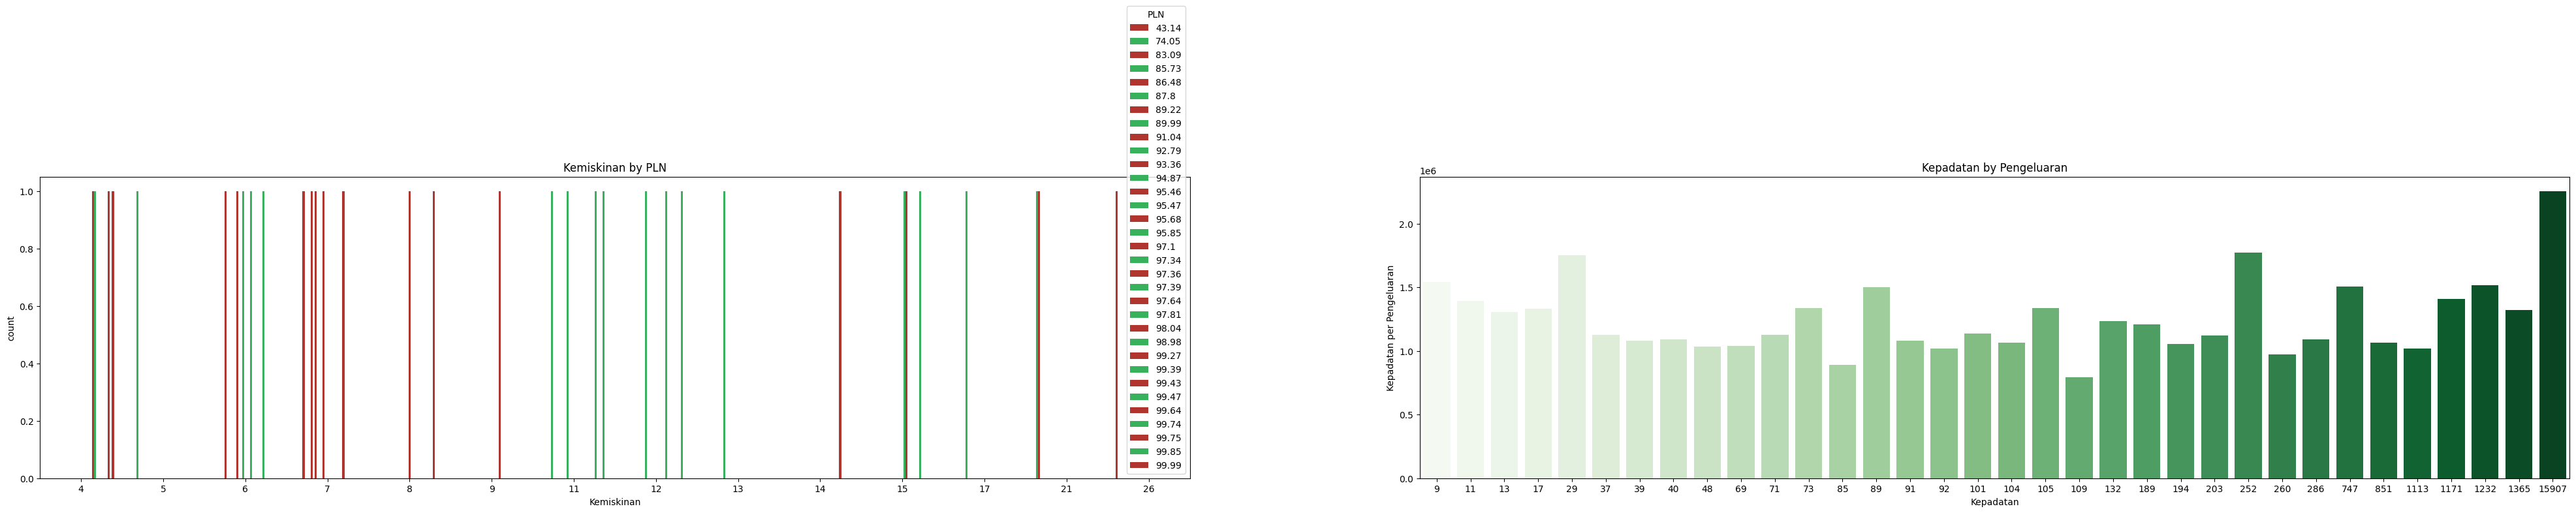

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(50,6))
a = sns.countplot(x='Kemiskinan', hue='PLN', data=df, palette=('#C52219', '#23C552'), ax=axarr[0]).set_title('Kemiskinan by PLN')
ax=axarr[1].set_title('Kepadatan by Pengeluaran')
b = sns.barplot(x='Kepadatan', y='Pengeluaran', data=df, palette="Greens", errorbar=None, ax=axarr[1]).set_ylabel('Kepadatan per Pengeluaran')

## Methods for Encoding [1](https://towardsdatascience.com/how-to-encode-categorical-data-d44dde313131) & [2](https://towardsdatascience.com/5-categorical-encoding-tricks-you-need-to-know-today-as-a-data-scientist-73cf75595298) Before Modeling


- **Label Encoding** adalah pengubahan label menjadi bentuk numerik untuk mengubahnya menjadi bentuk yang dapat dibaca mesin. Algoritma pembelajaran mesin kemudian dapat memutuskan dengan cara yang lebih baik tentang bagaimana label tersebut harus dioperasikan.
- **One Hot Encoding** adalah proses yang dikenal sebagai pengkodean variabel kategori menjadi variabel dummy. Metode pengolahan data ini mengubah kolom kategorikal biner (yes / no, male / female,…) menjadi vektor biner 0/1 dimana 0 menunjukkan tidak adanya baris yang termasuk dalam kategori tersebut. Metode ini bisa rumit jika digunakan untuk variabel multidimensi non-biner yang akan menghasilkan penambahan kolom yang tidak berguna. Misalnya, jika kita memiliki kolom yang mewakili x warna, satu pengkodean panas akan menghasilkan x kolom tambahan (warna_hijau, warna_biru,…).
- dll

In [ ]:
dataset = df.copy()
dataset.head()

,Provinsi,Penduduk,PendudukN,Kemiskinan,UsiaProduktif,PLN,Kepadatan,Pengeluaran,PengeluaranN,KatMiskin
0,Aceh,833,2.841,15,93,99.39,91,1080171,19.527,1
1,Sumatera Utara,1356,4.742,9,93,97.64,203,1124253,22.539,0
2,Sumatera Barat,364,1.135,6,93,97.39,132,1235050,30.109,0
3,Riau,491,1.595,7,93,91.04,73,1340446,37.31,0
4,Jambi,288,0.856,7,94,95.68,71,1126690,22.706,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for columns except Survived
for c in dataset.columns[1:]:
    if(dataset[c].dtype=='object'): # if column type = object (like "Tiket" and "Sex")
        dataset[c] = encoder.fit_transform(dataset[c])
    else: # else get the self column value without encode
        dataset[c] = dataset[c]

dataset.head()

,Provinsi,Penduduk,PendudukN,Kemiskinan,UsiaProduktif,PLN,Kepadatan,Pengeluaran,PengeluaranN,KatMiskin
0,Aceh,833,27,15,93,99.39,91,1080171,10,1
1,Sumatera Utara,1356,33,9,93,97.64,203,1124253,14,0
2,Sumatera Barat,364,16,6,93,97.39,132,1235050,19,0
3,Riau,491,19,7,93,91.04,73,1340446,24,0
4,Jambi,288,12,7,94,95.68,71,1126690,16,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provinsi       34 non-null     object 
 1   Penduduk       34 non-null     int64  
 2   PendudukN      34 non-null     int64  
 3   Kemiskinan     34 non-null     int64  
 4   UsiaProduktif  34 non-null     int64  
 5   PLN            34 non-null     float64
 6   Kepadatan      34 non-null     int64  
 7   Pengeluaran    34 non-null     int64  
 8   PengeluaranN   34 non-null     int64  
 9   KatMiskin      34 non-null     int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 2.9+ KB
